In [1]:
# Dataset: Amazon Reviews
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [2]:
# Setting Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

import nltk

In [3]:
# Read in data
dataframe = pd.read_csv("Reviews.csv")

In [4]:
print(dataframe.shape)
# Dataframe is very large and subsequent commands may be computationally expensive

(568454, 10)


In [5]:
# down-size the dataset
df = dataframe.head(500)

In [6]:
# Initial Data Exploration of Dataset
df.head()
# Unique ID, Product ID, User ID & Profile Name
# Helpfulness Numerator & Denominator
# Score (User Review Score given to Product)
# Time
# Summary (of User Review)
# Text (Review written by User for Product)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Visualising brekdown of Scores given by Users in df
Scores = df['Score'].value_counts()
Scores

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

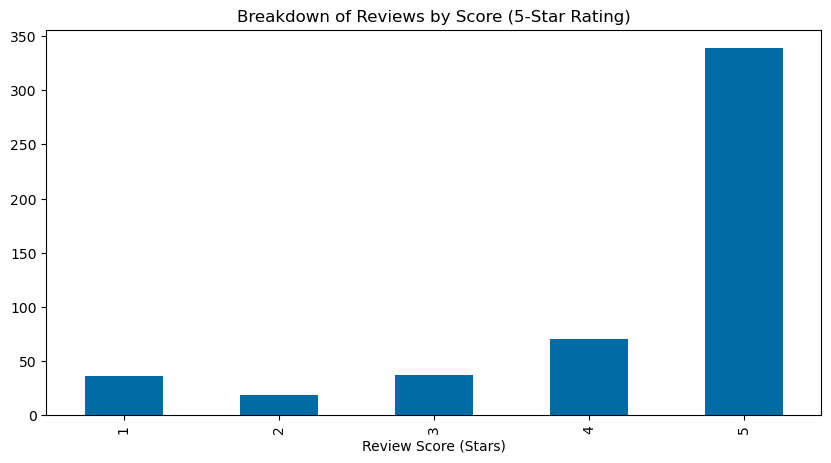

In [8]:
# Plotting Scores in sorted order
Score_plot = Scores.sort_index().plot(kind = 'bar',
                         title = "Breakdown of Reviews by Score (5-Star Rating)",
                        figsize = (10,5))
Score_plot.set_xlabel('Review Score (Stars)')
plt.show()
# Majority of Reviews are 5 stars

In [9]:
# Setting up Pthon NLTK
example = df['Text'][0]
print(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [10]:
# Tokenzing a sample text review
sample_tokens = nltk.word_tokenize(example)
sample_tokens[:10]

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food']

In [11]:
# Part of Speech Tagging
sample_tagged = nltk.pos_tag(sample_tokens)

In [12]:
# Grouping tagged words into chunks of text
entities = nltk.chunk.ne_chunk(sample_tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [13]:
# Bag of Words Approach VADER
# Removing Stop words (e.g. the, a, an)
# Scoring each word and tally up the score

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SIA = SentimentIntensityAnalyzer()

In [14]:
# Check to see if SIA is initialised
SIA

In [15]:
# Example of using polarity score from VADER with an actual tweet
SIA.polarity_scores("The way it should be! \
                    Nuggets vs Lakers in order for Denver to advance to the Finals! \
                    Happy for the Nuggets. Happy for LeBron. Happy for Coach Ham. Let’s go!")

{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9182}

In [16]:
# Another Example of a tweet
SIA.polarity_scores("Klay Thompson: \"It\'s gonna sting all summer. \
The first time in a long time that Dray, Steph and I were healthy and not making the Finals. \
It\'s rare to be off during this time of year. \
We gave everything we had. It stings but I believe that we have greatness in our future still.")

{'neg': 0.0, 'neu': 0.964, 'pos': 0.036, 'compound': 0.2144}

In [17]:
# Using the sample from dataset
SIA.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [18]:
# Run SIA through entire dataset

# Store polarity scores in dict
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    text_review = row['Text']
    myid = row['Id']
    
    #Store score in dict
    res[myid] = SIA.polarity_scores(text_review)

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
# Storing res as a pandas DataFrame , transposed for correction orientation
VADERS_res = pd.DataFrame(res).T

# Renaming index to original Id
VADERS_res = VADERS_res.reset_index().rename(columns = {'index' : 'Id'})

# Merging back into the original df
VADERS_res = VADERS_res.merge(df, how = "left")

In [20]:
# Sentiment Score and original data
VADERS_res.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


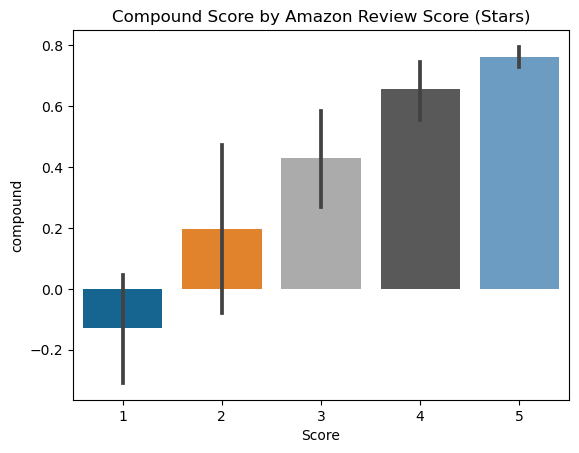

In [21]:
# Hypothesis: Higher scores will lead to more Positive Sentiment Scores

# Plotting data with seaborn
VADERS_plot = sns.barplot(data = VADERS_res, x = 'Score', y = 'compound')
VADERS_plot.set_title("Compound Score by Amazon Review Score (Stars)")
plt.show()

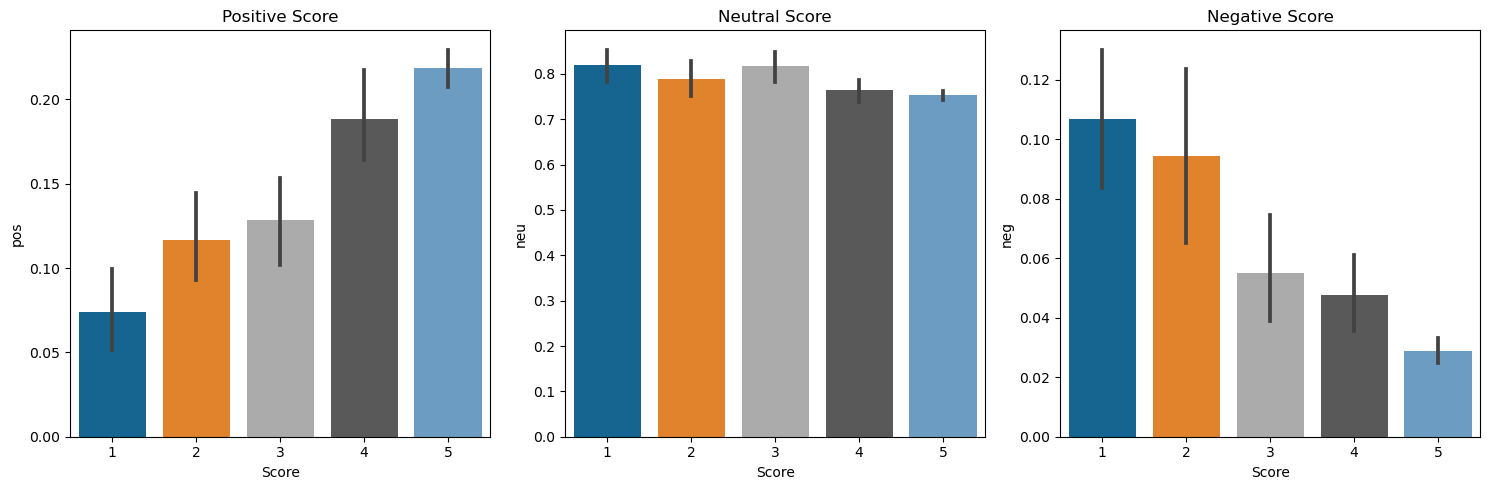

In [22]:
# Looking deeper into the scores, neg,neu,pos and compound
fig , axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data = VADERS_res, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = VADERS_res, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = VADERS_res, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title("Positive Score")
axs[1].set_title("Neutral Score")
axs[2].set_title("Negative Score")
plt.tight_layout()
plt.show()

In [23]:
# One Limitation of VADER is that it does not look at context of words
# Meaning it is unable to detect irony or sarcasm
# Roberta Pretrained Model from HuggingFace

# Setting up 
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch
from transformers import RobertaForSequenceClassification


In [24]:
# Roberta Pretrained Model from HuggingFace
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")


In [28]:
# Run Roberta on first example text
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)

# remove from tensor and into numpy
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# Store results into dict
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.023827065, 'roberta_neu': 0.91231483, 'roberta_pos': 0.047820274}


In [32]:
def roberta_polarity_scores(example):
    # Run Roberta on first example text
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)

    # remove from tensor and into numpy
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Store results into dict
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }

    return scores_dict

In [38]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    
    # ROBERTA model has issues with text reviews due to size of the text itself
    try:
        text_review = row['Text']
        myid = row['Id']

        # Running VADER
        VADER_res = SIA.polarity_scores(text_review)

        # Renaming VADER results in dict
        VADER_res_rename = {}
        for key, value in VADER_res.items():
            VADER_res_rename[f"vader_{key}"] = value

        # Running Roberta
        roberta_res = roberta_polarity_scores(text_review)

        # Combining both res dicts
        both_dicts = {**VADER_res_rename, **roberta_res}

        res[myid] = both_dicts
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id83
Broke for id187


In [41]:
# Read into pandas DataFrame and Transpose for correct orientation
res_df = pd.DataFrame(res).T

# rename index into id to left-merge back into original data set
res_df = res_df.reset_index().rename(columns = {'index' : 'Id'})
res_df = res_df.merge(df, how = "left")

In [42]:
# Check merge
res_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.023827,0.912315,0.047820,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.682888,0.024354,0.026140,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.013362,0.936446,0.039169,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.017257,0.852645,0.111251,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.016154,0.939561,0.035565,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


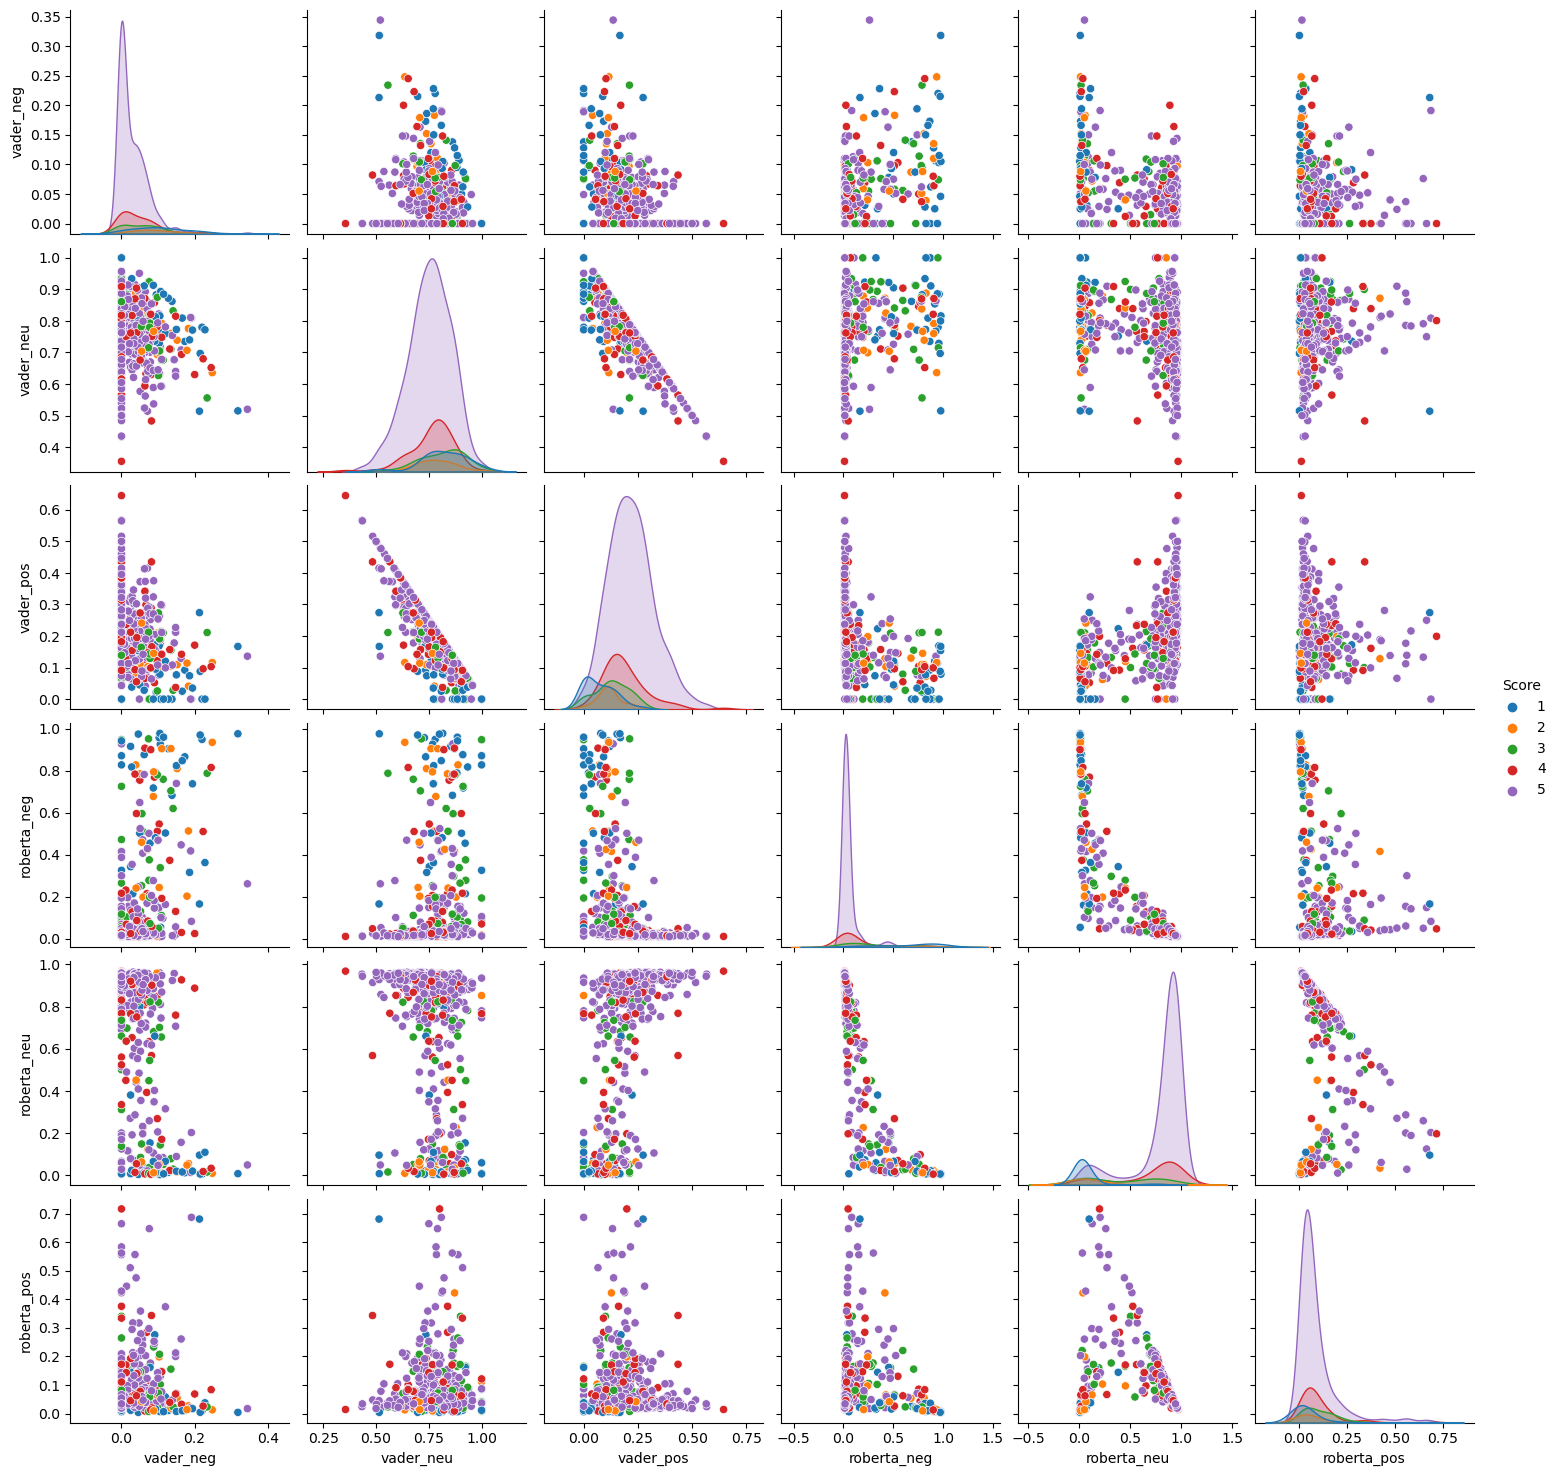

In [45]:
# Comparing scores between VADER and Roberta
# Using seaborn to combine and compare
sns.pairplot(data = res_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
                                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = "Score",
            palette = 'tab10')
plt.show()

In [51]:
# Looking at Outliers

# The most positive 1-star review according to Roberta
res_df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

# Model could have been thrown off by the sarcasm of the last two sentences


'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [52]:
# The most positive 1-star review according to VADER
res_df.query('Score == 1').sort_values('vader_pos', ascending = False)['Text'].values[0]

# same tongue-in-cheek review

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [53]:
# The most negative 5-star review according to Roberta
res_df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

# Sentiment is indeed negative, but reviewer still gave 5 stars

'the price on this product certainly raises my attention on compairing amazon price with the local stores. i can get a can of this rotel at my local kroger for $1. dissapointing!'

In [54]:
# The most negative 5-star review according to VADER
res_df.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

# Positive review but a negative sentiment, which is not about the product being bad

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'